In [4]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from collections import Counter

In [5]:
#create an imbalanced dataset
X,y = make_classification(n_samples=100000,n_features=2,n_informative=2,
                          n_redundant=0,n_repeated=0,n_classes=2,
                          n_clusters_per_class=1,
                          weights=[0.995,0.005],
                          class_sep=0.5,random_state=0)

In [8]:
X[:5]

array([[ 1.23649661,  0.57927154],
       [-0.18872011, -0.02200116],
       [-0.65384426,  0.79430947],
       [ 0.00557201,  0.59337029],
       [ 0.48257269,  0.7969016 ]])

In [9]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
#convert the data to pandas dataframe
df = pd.DataFrame({"Feature1":X[:,0],"Feature2":X[:,1],"Target":y})

In [12]:
df

,Feature1,Feature2,Target
0,1.236497,0.579272,0
1,-0.188720,-0.022001,0
2,-0.653844,0.794309,0
3,0.005572,0.593370,0
4,0.482573,0.796902,0
...,...,...,...
99995,-1.377568,0.659066,0
99996,-0.252317,0.346224,0
99997,-0.700496,0.308327,0
99998,-1.638941,0.351496,0


In [14]:
df["Target"].value_counts(normalize=True)

0    0.9897
1    0.0103
Name: Target, dtype: float64

<AxesSubplot:xlabel='Feature1', ylabel='Feature2'>

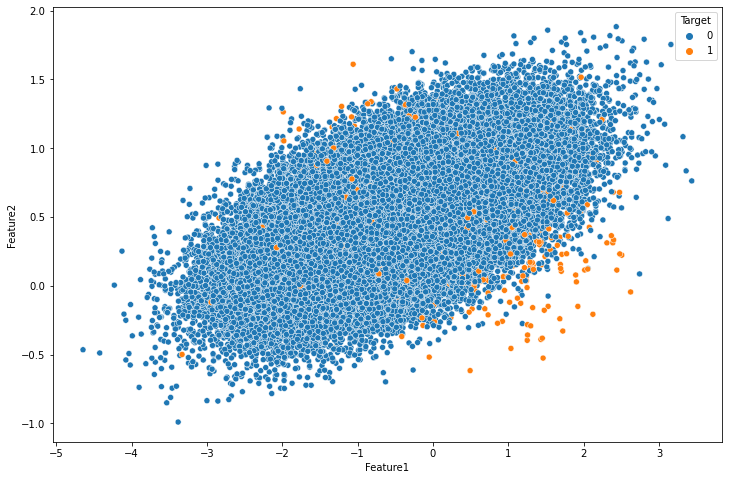

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Feature1",y="Feature2",hue="Target",data=df)

In [16]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
X_train.shape

(80000, 2)

In [18]:
X_test.shape

(20000, 2)

In [19]:
#Check the number of each class in the train dataset
sorted(Counter(y_train).items())

[(0, 79183), (1, 817)]

In [20]:
sorted(Counter(y_test).items())

[(0, 19787), (1, 213)]

In [22]:
#Train the random forest model
rf = RandomForestClassifier()
model=rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
#check the performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.46      0.03      0.05       213

    accuracy                           0.99     20000
   macro avg       0.73      0.51      0.52     20000
weighted avg       0.98      0.99      0.98     20000



# Random Over Sampling

In [25]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

In [26]:
#check the number of vrecords after oversampling
sorted(Counter(y_train_ros).items())

[(0, 79183), (1, 79183)]

In [27]:
df_ros = pd.DataFrame({"Feature1":X_train_ros[:,0],"Feature2":X_train_ros[:,1],"Target":y_train_ros})

Text(0.5, 1.0, 'Random Over Sampling')

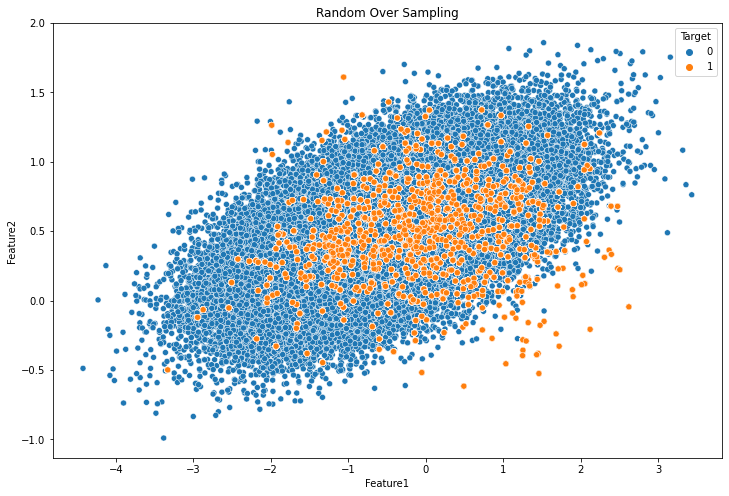

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Feature1",y="Feature2",hue="Target",data=df_ros)
plt.title("Random Over Sampling")

In [30]:
#Train the random forest model
#rf = RandomForestClassifier()
model_ros=rf.fit(X_train_ros,y_train_ros)
y_pred_ros = model.predict(X_test)

In [31]:
#check the performance
print(classification_report(y_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.18      0.04      0.07       213

    accuracy                           0.99     20000
   macro avg       0.58      0.52      0.53     20000
weighted avg       0.98      0.99      0.98     20000



### Recall didnt increase that much. here our main metric is recall or our object is to improve the correct prediction of True Posotive of the minority class (Assuming that we are predicting fraud detection analysis,incase of spam detection imp metric will be precision. to improve the rate of False positive)

# Smote (Synthetic Minority Oversampling Technique)

In [32]:
# randomly over sample the minority class 
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [33]:
#check the number of records after SMOTE oversampling
sorted(Counter(y_train_smote).items())

[(0, 79183), (1, 79183)]

In [34]:
df_smote = pd.DataFrame({"Feature1":X_train_smote[:,0],"Feature2":X_train_smote[:,1],"Target":y_train_smote})

Text(0.5, 1.0, 'SMOTE Over Sampling')

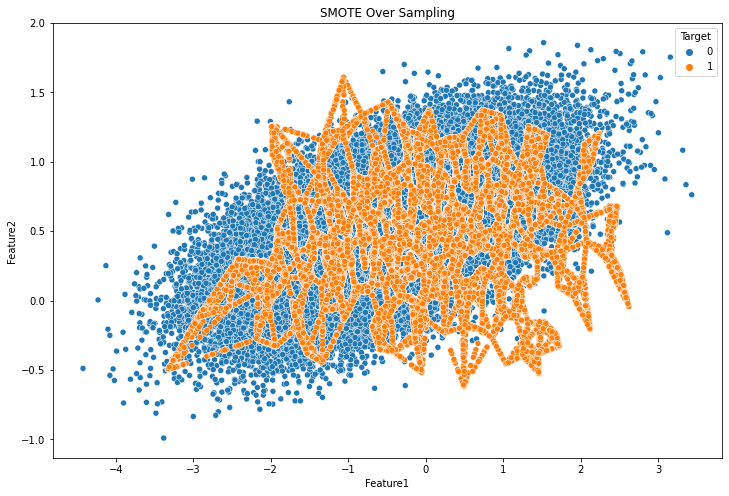

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Feature1",y="Feature2",hue="Target",data=df_smote)
plt.title("SMOTE Over Sampling")

In [38]:
#Train the random forest model
#rf = RandomForestClassifier()
model_smote=rf.fit(X_train_smote,y_train_smote)
y_pred_smote = model.predict(X_test)

In [40]:
#check the performance
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     19787
           1       0.01      0.23      0.03       213

    accuracy                           0.83     20000
   macro avg       0.50      0.53      0.47     20000
weighted avg       0.98      0.83      0.90     20000



### Recall significantly increased from 0.04 to 0.23

# Random Under Sampling

In [42]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

In [43]:
#check the number of records after undersampling
sorted(Counter(y_train_rus).items())

[(0, 817), (1, 817)]

In [44]:
df_rus = pd.DataFrame({"Feature1":X_train_rus[:,0],"Feature2":X_train_rus[:,1],"Target":y_train_rus})

Text(0.5, 1.0, 'Random Under Sampling')

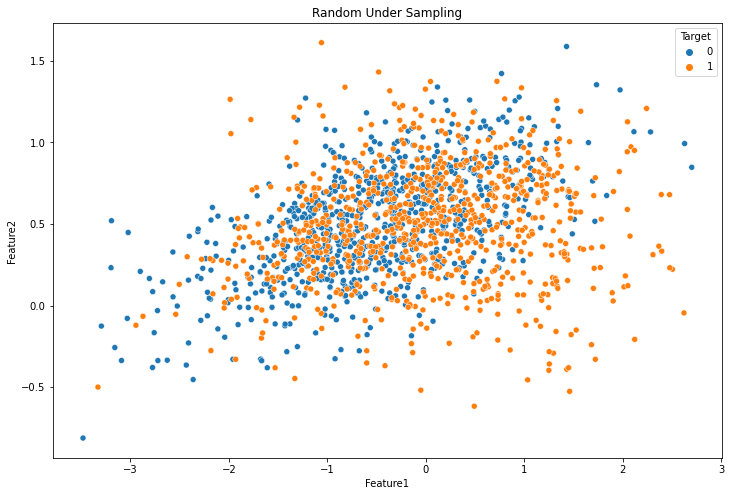

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Feature1",y="Feature2",hue="Target",data=df_rus)
plt.title("Random Under Sampling")

In [46]:
#Train the random forest model
#rf = RandomForestClassifier()
model_rus=rf.fit(X_train_rus,y_train_rus)
y_pred_rus = model.predict(X_test)

In [47]:
#check the performance
print(classification_report(y_test,y_pred_rus))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     19787
           1       0.01      0.52      0.03       213

    accuracy                           0.60     20000
   macro avg       0.50      0.56      0.39     20000
weighted avg       0.98      0.60      0.74     20000



### after under sampling recall is 0.52 for class 0 which is a much better result where as recall for class 1 decreases to 0.60

In [48]:
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train,y_train) 

In [50]:
#check the number of records after nearmiss sampling
sorted(Counter(y_train_nearmiss).items())

[(0, 817), (1, 817)]

In [51]:
df_nearmiss = pd.DataFrame({"Feature1":X_train_nearmiss[:,0],"Feature2":X_train_nearmiss[:,1],"Target":y_train_nearmiss})

Text(0.5, 1.0, 'Nearmiss Under Sampling')

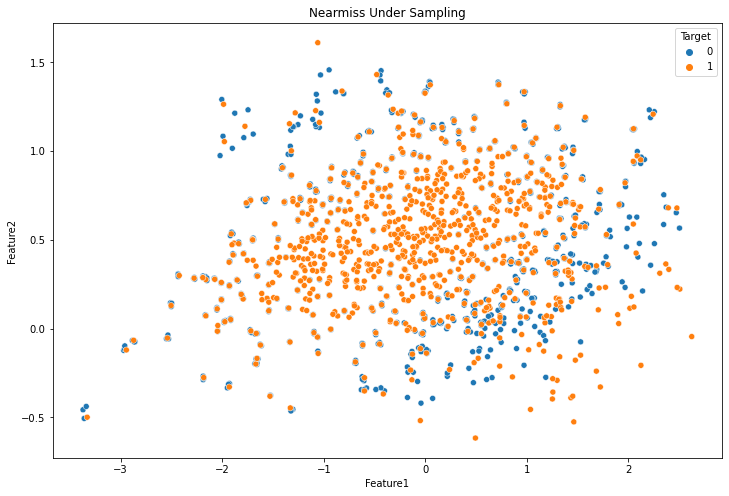

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Feature1",y="Feature2",hue="Target",data=df_nearmiss)
plt.title("Nearmiss Under Sampling")

In [53]:
#Train the random forest model
#rf = RandomForestClassifier()
model_nearmiss=rf.fit(X_train_nearmiss,y_train_nearmiss)
y_pred_nearmiss = model.predict(X_test)

In [54]:
#check the performance
print(classification_report(y_test,y_pred_nearmiss))

              precision    recall  f1-score   support

           0       0.99      0.39      0.56     19787
           1       0.01      0.56      0.02       213

    accuracy                           0.39     20000
   macro avg       0.50      0.47      0.29     20000
weighted avg       0.98      0.39      0.55     20000



### recall is highest for this method